# Basic period analysis #

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
%matplotlib inline

Read-in the data and plot

Text(0, 0.5, 'flux')

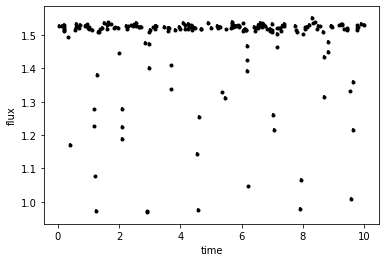

In [6]:
times,flux,fluxerr = np.loadtxt('lc.data',unpack=True)
plt.errorbar(times,flux,yerr=fluxerr,fmt='k.')
plt.xlabel('time')
plt.ylabel('flux')

Now let's run a Lomb-Scargle period analysis based on the implementation of Press & Rybicki (1989)

Text(0.5, 0, 'Freq')

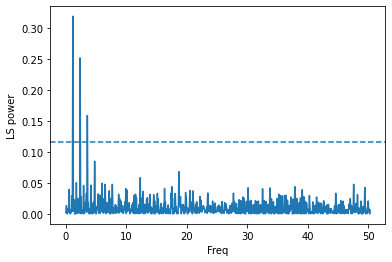

In [37]:
ls = LombScargle(times, flux, fluxerr)
frequency, power = ls.autopower()
one_percent=ls.false_alarm_level(0.01)
plt.plot(frequency,power)
plt.axhline(one_percent,ls='--')
plt.ylabel("LS power")
plt.xlabel("Freq")

Let's plot again, but zoom in on the region of interest

(0.0, 5.0)

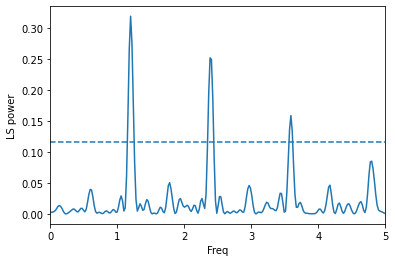

In [16]:
plt.plot(frequency,power)
plt.axhline(one_percent,ls='--')
plt.ylabel("LS power")
plt.xlabel("Freq")
plt.xlim([0,5])

It seems pretty clear that the lower peaks are aliases of the strongest peak

(0.0, 5.0)

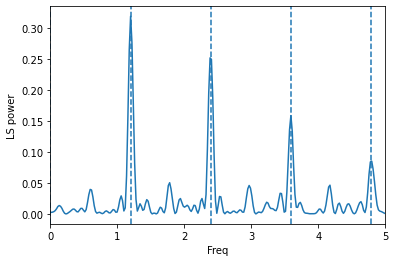

In [25]:
peak=frequency[np.where(power==power.max())]
plt.plot(frequency,power)
for x in range(0,5):
    plt.axvline(x*peak,ls='--')
plt.ylabel("LS power")
plt.xlabel("Freq")
plt.xlim([0,5])

Let's see what the light curve looks like folded on this period

Text(0, 0.5, 'Flux')

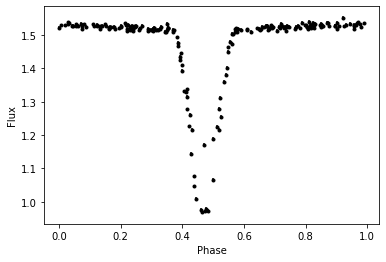

In [27]:
period=1/peak
phases=(times%period)/period
plt.errorbar(phases,flux,yerr=fluxerr,fmt='k.')
plt.xlabel("Phase")
plt.ylabel("Flux")

Quite clearly, we have two eclipses that have been phased up together.  So, the period is actually double this value.
If the eccentricity were greater, then this would be more obvious.

Text(0, 0.5, 'Flux')

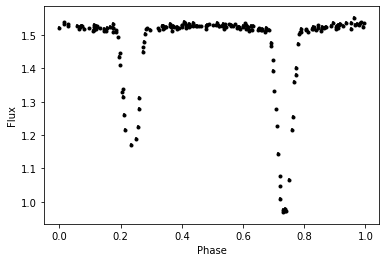

In [28]:
period=2/peak
phases=(times%period)/period
plt.errorbar(phases,flux,yerr=fluxerr,fmt='k.')
plt.xlabel("Phase")
plt.ylabel("Flux")

Here we've stumbled across only one of the issues with assuming the strongest peak is reflective of the true periodicity.  There are many others which will depend on the object and your data, so never blindly accept the result!

Perhaps the most important issue conceptually, is the idea of the window function - or what periodicity would be identified just based on the sampling of your data.  You can quickly and easily inspect this by replacing your data with a non-variable array

(0.0, 0.2)

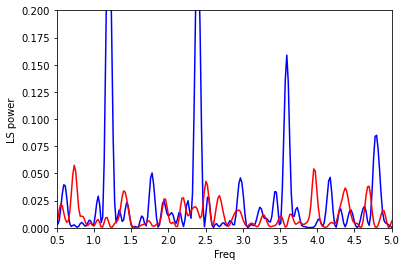

In [41]:
windowls = LombScargle(times, np.ones(len(times)))
window_frequency, window_power = windowls.autopower()
plt.plot(frequency,power,c='b')
plt.plot(window_frequency,window_power,c='r')
plt.ylabel("LS power")
plt.xlabel("Freq")
plt.xlim([0.5,5])
plt.ylim([0,0.2])

Here it is clear that our period does not line up with a peak of the window function, so we're pretty safe. If this were not the case, we should probably explore other possible periodicities (or try to obtain more data to break possible degeneracies).

It is not the case with this synthetic data, but the window function for real data often shows very strong peaks around 1d (and its aliases). So, one should always be particularly wary of periods very close to 1d, 2d, 0.5d, etc.